In [1]:
import pandas as pd

In [2]:
student_perform = pd.read_csv("~/Documents/2scripts/ScientificPython/1_Basics/Lecture3_DataWrangling/data/StudentsPerformance.csv")

## Exploring data

In [4]:
student_perform.tail(5)
# last 5 elements

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
student_perform.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
student_perform.dtypes.value_counts()

object    5
int64     3
dtype: int64

In [7]:
student_perform.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# attributes
print(student_perform.shape) # dimention
print("\n")
print(student_perform.size) # N of cells 
print("\n")
print(list(student_perform)) # list of column names

(1000, 8)


8000


['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [9]:
student_perform.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [10]:
student_perform.groupby('gender')

In [11]:
student_perform.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482


In [14]:
student_perform.groupby('gender').aggregate({'math score': 'min'})

,math score
gender,
female,0
male,27


In [15]:
student_perform.groupby(['gender', 'race/ethnicity'])\
    .aggregate({'math score': 'mean', 'reading score': 'mean'})

math score  reading score
gender race/ethnicity                           
female group A          58.527778      69.000000
       group B          61.403846      71.076923
       group C          62.033333      71.944444
       group D          65.248062      74.046512
       group E          70.811594      75.840580
male   group A          63.735849      61.735849
       group B          65.930233      62.848837
       group C          67.611511      65.424460
       group D          69.413534      66.135338
       group E          76.746479      70.295775

In [16]:
mean_scores = student_perform.groupby(['gender', 'race/ethnicity']) \
    .aggregate({'math score': 'mean', 'reading score': 'mean'}) \
    .rename(columns = {'math score': 'mean_math_score', 'reading score': 'mean_reading_score'})
mean_scores

mean_math_score  mean_reading_score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923
       group C               62.033333           71.944444
       group D               65.248062           74.046512
       group E               70.811594           75.840580
male   group A               63.735849           61.735849
       group B               65.930233           62.848837
       group C               67.611511           65.424460
       group D               69.413534           66.135338
       group E               76.746479           70.295775

In [17]:
mean_scores.index # multi indexes

MultiIndex([('female', 'group A'),
            ('female', 'group B'),
            ('female', 'group C'),
            ('female', 'group D'),
            ('female', 'group E'),
            (  'male', 'group A'),
            (  'male', 'group B'),
            (  'male', 'group C'),
            (  'male', 'group D'),
            (  'male', 'group E')],
           names=['gender', 'race/ethnicity'])

In [ ]:
# remove "gender index"

In [18]:
mean_scores2 = student_perform.groupby(['gender', 'race/ethnicity'], as_index=False) \
    .aggregate({'math score': 'mean', 'reading score': 'mean'}) \
    .rename(columns = {'math score': 'mean_math_score', 'reading score': 'mean_reading_score'})
mean_scores2

,gender,race/ethnicity,mean_math_score,mean_reading_score
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


In [19]:
mean_scores2.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [21]:
student_perform.pivot_table(index=['gender', 'race/ethnicity'],
                            columns='lunch',
                            values='math score',
                            aggfunc='max') # mean

lunch                  free/reduced  standard
gender race/ethnicity                        
female group A                   77        92
       group B                   78        97
       group C                   82        96
       group D                   93        98
       group E                   92       100
male   group A                   81       100
       group B                   88        94
       group C                   87        98
       group D                   90       100
       group E                  100       100

In [ ]:
# selecting columns and rows

In [22]:
student_perform.drop(['parental level of education', 'lunch'], axis=1).head()

,gender,race/ethnicity,test preparation course,math score,reading score,writing score
0,female,group B,none,72,72,74
1,female,group C,completed,69,90,88
2,female,group B,none,90,95,93
3,male,group A,none,47,57,44
4,male,group C,none,76,78,75


In [23]:
# What will happen if I execute:
student_perform[0:5, 0:5]

TypeError: '(slice(0, 5, None), slice(0, 5, None))' is an invalid key

In [24]:
student_perform.iloc[0:5, 0:5] # integer location # !!!__until 5th__!!!

# integer-location based indexing for selection by position

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [25]:
student_perform.iloc[0:5] # integer location

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
student_perform.loc[0:5] # integer location # !!!__including 5th__!!! 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [ ]:
student_perform.loc[:5]

In [ ]:
# .loc also allows to access a group of rows and columns by label(s) (!) or a boolean (!) array.

In [ ]:
# Giving boolean to `loc`

In [28]:
# If you have good column names:

student_perform.gender.head()

0    female
1    female
2    female
3      male
4      male
Name: gender, dtype: object

In [27]:
student_perform.gender.head() == "male"

0    False
1    False
2    False
3     True
4     True
Name: gender, dtype: bool

In [29]:
student_perform.loc[student_perform.gender == "male"] # try with iloc

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52
...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75
994,male,group A,high school,standard,none,63,63,62


In [ ]:
# you can even omit .loc

In [30]:
student_perform[student_perform.gender == "male"]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52
...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75
994,male,group A,high school,standard,none,63,63,62


In [ ]:
# Renaming column names

In [31]:
student_perform.rename(columns = {"math score": "math_score"}) 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
# Even better names

In [32]:
student_perform.columns = [x.replace(" ", "_") for x in student_perform.columns]
student_perform.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
student_perform.writing_score.mean()

68.054

In [34]:
student_perform["writing_score"].mean()

68.054

In [ ]:
# Let's find all female students with writing score more than 99

In [ ]:
student_perform.loc[(student_perform['writing_score'] > 99) & (student_perform.gender == 'female')]

In [ ]:
# built-in function for query:

In [35]:
# student_perform[student_perform['lunch'] == "standard"]

# is equal to: 

student_perform.query("lunch == 'standard'")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
987,male,group E,some high school,standard,completed,81,75,76
991,female,group B,some high school,standard,completed,65,82,78
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95


In [ ]:
student_perform.query("lunch == 'free/reduced' & gender == 'male'")

In [ ]:
# more about query sintax:

In [37]:
outer_value = "female"

In [38]:
student_perform.query("lunch == 'free/reduced' & gender == @outer_value")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
9,female,group B,high school,free/reduced,none,38,60,50
17,female,group B,some high school,free/reduced,none,18,32,28
19,female,group C,associate's degree,free/reduced,none,54,58,61
21,female,group B,some college,free/reduced,completed,65,75,70
32,female,group E,master's degree,free/reduced,none,56,72,65
...,...,...,...,...,...,...,...,...
989,female,group D,some college,free/reduced,completed,67,86,83
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
997,female,group C,high school,free/reduced,completed,59,71,65


In [ ]:
outer_values = ["bachelor's degree", "master's degree"]
student_perform.query("parental_level_of_education == @outer_values")

In [ ]:
student_perform[student_perform['parental_level_of_education'].isin(["bachelor's degree", "master's degree"])]

In [ ]:
# What will be the output?

In [ ]:
scores = [i for i in list(student_perform) if "score" in i]

In [ ]:
scores

In [ ]:
student_perform[scores]

In [ ]:
student_perform.filter(like="score") # Keep labels from axis for which “like in label == True”.

In [40]:
student_perform.filter(like="score", axis = 1) # filter for rows

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


## visual data exploration is also available inside pandas via matplotlib..

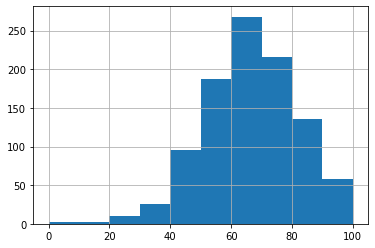

In [41]:
student_perform.math_score.hist()

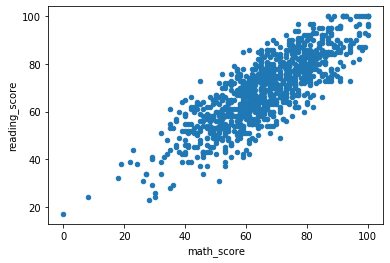

In [42]:
student_perform.plot.scatter(x='math_score', y='reading_score')

## ..but it's more preferable to use seaborn library

In [43]:
import seaborn as sns

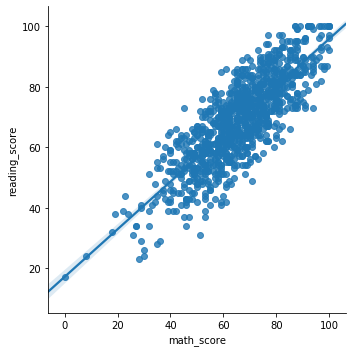

In [44]:
sns.lmplot(x='math_score', y='reading_score', data=student_perform) 
# linear approxim of two variables interconnection

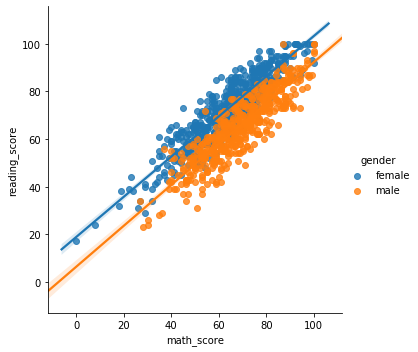

In [45]:
sns.lmplot(x='math_score', y='reading_score', hue='gender', data=student_perform) 

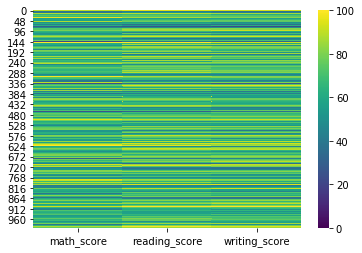

In [46]:
sns.heatmap(student_perform.iloc[:, 5:8], cmap = "viridis")

In [47]:
# there are preloaded datasets in seaborn library to test your ideas:

import seaborn as sns
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
